# **Data Preprocessing**

Data resource: UCI Machine Learning Repository

Bank Marketing Dataset(data folder) (URL: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)

File name: bank.csv

Data description:

Attribute information:

Attribute Information:

| Column Name | Description | Type | 
|:------------- | :------------- | :------------- |
|   age   | Age of the client | Numeric | 
| job | Client's occupation  | Categorial: <ul><li> admin </li> <li> blue-collar </li> <li> entrepreneur </li> <li> housemaid </li> <li> management </li> <li>retired </li> <li> self-employed </li> <li> services </li> <li> student </li> <li> technician </li> <li> unemployed </li> <li>unknown</li> </ul>| 
| marital   | Marital status  | Categorial: <ul> <li> divorced </li> <li> married </li> <li> single </li> <li> unknown </li> </ul> <br> <B>Note:</B> divorced means divorced  or widowed |
| education | Client's education level | Categorial: <ul> <li> basic.4y </li> <li> basic.6y </li> <li> basic.9y </li> <li> high.school </li> <li> illiterate </li> <li> professional.course </li> <li> university.degree </li> <li>  unknown </li> </ul> |
| default  | Indicates whether the client has credit in default  | Categorial: <ul> <li> no </li> <li> yes </li> <li> unknown </li> </ul>|
| housing  | Indicates whether the client has a housing loan | Categorial: <ul> <li> no </li> <li> yes </li> <li>  unknown </li> </ul>|
| loan   | Indicates whether the client as a personal loan  | Categorial: <ul><li>no</li><li>yes</li><li>unknown</li></ul>|
| contact | Type of contact communication | Categorial: <ul> <li> cellular </li> <li> telephone </li> </ul> |
| month | Month that last contact was made  | Categorial: <ul> <li> jan </li> <li> feb </li> <li>  ... </li> <li> dec </li> </u>|
| day_of_week | Day that last contact was made   | Categorial: <ul> <li> mon </li> <li> tue </li> <li> wed </li> <li> thu </li> <li> fri </li> </ul>|
| duration | Duration of last contact in seconds  | Numeric <br> <B>Note:</B> This attribute highly affects the  <br> output target (e.g., if duration=0 then y=no). <br> Yet, the duration is  not known before <br> a call is performed.   Also, after the end <br> of the call, y is obviously  known. Thus, this input <br> should only be included for  benchmark purposes <br> and should  be discarded if the intention is  to have <br> a realistic predictive model.|
| campaign | Number of contacts performed during this <br> campaign for this client (including last contact) | Numeric |
| pdays | Number of days since the client was <br> last contacted in a previous campaign | Numeric <br> <B> Note: </B> 999 means client was not previously <br> contacted|
| poutcome | Outcome of the previous marketing campaign | Categorial: <ul> <li> failure </li> <li> nonexistent </li> <li> success </li> </ul>|
| empvarrate | Employment variation rate (quarterly indicator) <br><B>Note:</B> This column was named emp.var.rate in the <br>original data set.| Numeric |
| conspriceidx | Consumer price index (monthly indicator) <br> <B> Note: </B> This column was named cons.price.idx in the <br> original data set. | Numeric |
| euribor3m | Euribor 3-month rate (daily indicator) | Numeric |
| nremployed | Number of employees (quarterly indicator) <br> <B> Note: </B> This column was named nr.employed in the <br> original data set.  | Numeric |

# **Output Variable**

There is one column in the table that corresponds to our target value.

| Column Name | Description | Type | 
|:------------- | :------------- | :------------- |
| y | Indicates whether the client has subscribed <br> for a term deposit | Binary (yes or no)|



In [1]:
#importing libaries
import pandas as pd
import numpy as np

In [2]:
#importing file from harddrive
from google.colab import files
uploaded= files.upload()

Saving bank.csv to bank.csv


In [3]:
#Save file in Pandas data frame
df = pd.read_csv("bank.csv", sep=";")

In [4]:
#See 1st five data from the beginning of the file
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [5]:
#Code to see last 5 rows of the dataset
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [6]:
#Findout how many data are there is the dataset (Number of rows and columns)
df.shape

(4521, 17)

There are two types of data in the dataset. Categorical and Numerical. We can also see that although some data are numerical they are not normalized. Normalization is a technique which provides data a certain standard. That means the data are within a range like (0 and 1) or (-1 and 1).

We can manipulate our data like transfering categorical data to numerical or normalized data using different techniques that are provided by Pandas. Our first technique will be apply method. **apply method** can apply a *lamda fuction* or a predefine function in every row in the dataset.

In [7]:
df['contact'].unique()

array(['cellular', 'unknown', 'telephone'], dtype=object)

Unknown is replaced by *np.nan*. **np.nan**.  It helps us to eliminating the missing values later.

In [8]:
# change 'yes' and 'no' value in one go
one_values = ['yes', 'cellular']
zero_values = ['no', 'telephone']
n_values= ['unknown']
for column in df.columns:
    df[column] = df[column].replace(to_replace=[one_values], value=1)
    df[column] = df[column].replace(to_replace=[zero_values], value=0)
    df[column] = df[column].replace(to_replace=[n_values], value= np.nan)

In [9]:
#To know the attribute values of marital
df['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

 Build a dictionary to categorize the values as 0 for single, 1 for married and 2 for divorced. 


In [10]:
df['marital'].replace({'single': 0,
                       'married': 1,
                       'divorced': 2}, inplace=True)

In [11]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,1,primary,0,1787,0,0,1.0,19,oct,79,1,-1,0,NaN,0
1,33,services,1,secondary,0,4789,1,1,1.0,11,may,220,1,339,4,failure,0
2,35,management,0,tertiary,0,1350,1,0,1.0,16,apr,185,1,330,1,failure,0
3,30,management,1,tertiary,0,1476,1,1,NaN,3,jun,199,4,-1,0,NaN,0
4,59,blue-collar,1,secondary,0,0,1,0,NaN,5,may,226,1,-1,0,NaN,0


In [12]:
df['job'].unique()

array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', nan], dtype=object)

Build a dictionary to categorize the values as 0 for unemployed, 1 for services and 2 for management and so on. 

In [13]:
df['job'].replace({
                       'unemployed': 0,
                       'services': 1,
                       'management': 2,
                       'blue-collar': 3,
                   'self-employed':4,
                   'technician':5,
                   'entrepreneur':6,
                   'admin':7,
                   'student':8,
                   'housemaid':9,
                   'retired':10

                   }, inplace=True)

In [14]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,0,1,primary,0,1787,0,0,1.0,19,oct,79,1,-1,0,NaN,0
1,33,1,1,secondary,0,4789,1,1,1.0,11,may,220,1,339,4,failure,0
2,35,2,0,tertiary,0,1350,1,0,1.0,16,apr,185,1,330,1,failure,0
3,30,2,1,tertiary,0,1476,1,1,NaN,3,jun,199,4,-1,0,NaN,0
4,59,3,1,secondary,0,0,1,0,NaN,5,may,226,1,-1,0,NaN,0


In [15]:
df['education'].unique()

array(['primary', 'secondary', 'tertiary', nan], dtype=object)

In [16]:
df['education'].replace({
                       'primary': 0,
                       'secondary': 1,
                       'tertiary': 2,
                   }, inplace=True)

In [17]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,0,1,0.0,0,1787,0,0,1.0,19,oct,79,1,-1,0,NaN,0
1,33,1,1,1.0,0,4789,1,1,1.0,11,may,220,1,339,4,failure,0
2,35,2,0,2.0,0,1350,1,0,1.0,16,apr,185,1,330,1,failure,0
3,30,2,1,2.0,0,1476,1,1,NaN,3,jun,199,4,-1,0,NaN,0
4,59,3,1,1.0,0,0,1,0,NaN,5,may,226,1,-1,0,NaN,0


In [18]:
df['month'].unique()

array(['oct', 'may', 'apr', 'jun', 'feb', 'aug', 'jan', 'jul', 'nov',
       'sep', 'mar', 'dec'], dtype=object)

In [19]:
df['month'].replace({
                       'jan': 1,
                       'feb': 2,
                       'mar': 3,
                   'apr':4,
                   'may':5,
                   'jun':6,
                   'jul':7,
                   'aug':8,
                   'sep':9,
                   'oct':10,
                   'nov':11,
                   'dec':12,

                   }, inplace=True)

In [20]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,0,1,0.0,0,1787,0,0,1.0,19,10,79,1,-1,0,NaN,0
1,33,1,1,1.0,0,4789,1,1,1.0,11,5,220,1,339,4,failure,0
2,35,2,0,2.0,0,1350,1,0,1.0,16,4,185,1,330,1,failure,0
3,30,2,1,2.0,0,1476,1,1,NaN,3,6,199,4,-1,0,NaN,0
4,59,3,1,1.0,0,0,1,0,NaN,5,5,226,1,-1,0,NaN,0


In [21]:
#another way to find out all the values of the a particular column
df.y.unique()

array([0, 1])

# **Feature Normalization**
Assume you have a dataset X, which has N rows(entries) and D columns(features). X[:,i] represent feature i and X[j,:] represent entry j.

**Min-Max Normalization:**

$\hat{X}[:,i] = \frac {X[:,i]- min(X[:,i])}{max(X[:,i]) - min (X[:,i])}$ 

This method rescales the range of the data to [0,1]. In most cases, standardization is used feature-wise as well

**Importance of Normalization:**

Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise normalization such as MinMax Scaling is usually used prior to model fitting.

In [22]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,0,1,0.0,0,1787,0,0,1.0,19,10,79,1,-1,0,NaN,0
1,33,1,1,1.0,0,4789,1,1,1.0,11,5,220,1,339,4,failure,0
2,35,2,0,2.0,0,1350,1,0,1.0,16,4,185,1,330,1,failure,0
3,30,2,1,2.0,0,1476,1,1,NaN,3,6,199,4,-1,0,NaN,0
4,59,3,1,1.0,0,0,1,0,NaN,5,5,226,1,-1,0,NaN,0


In [23]:
#Find the maximum value of an attribute
print(df['duration'].max())
#Find the minimum value of the attribute
print(df['duration'].min())
#Find the avg value of duration
print(df['duration'].mean())

3025
4
263.96129174961294


In [24]:
#Normalize "duration" attribute using Min- Max Normalization

df.duration = df.duration.apply(lambda v:((v - df.duration.min())/(df.duration.max()-df.duration.min())))

In [25]:
#Normalize "balance" attribute using Min- Max Normalization
df.balance = df.balance.apply(lambda n:((n - df.balance.min())/(df.balance.max()-df.balance.min())))

In [26]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,0,1,0.0,0,0.068455,0,0,1.0,19,10,0.024826,1,-1,0,NaN,0
1,33,1,1,1.0,0,0.108750,1,1,1.0,11,5,0.071500,1,339,4,failure,0
2,35,2,0,2.0,0,0.062590,1,0,1.0,16,4,0.059914,1,330,1,failure,0
3,30,2,1,2.0,0,0.064281,1,1,NaN,3,6,0.064548,4,-1,0,NaN,0
4,59,3,1,1.0,0,0.044469,1,0,NaN,5,5,0.073486,1,-1,0,NaN,0


In [27]:
df['poutcome'].unique()

array([nan, 'failure', 'other', 'success'], dtype=object)

In [28]:
df['poutcome'].replace({
                       'failure': 0,
                       'success': 1,
                       'other': 2,
                   }, inplace=True)

In [29]:
#Normalize "pdays" attribute using Min- Max Normalization
df.pdays = df.pdays.apply(lambda n:((n - df.pdays.min())/(df.pdays.max()-df.pdays.min())))

In [30]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,0,1,0.0,0,0.068455,0,0,1.0,19,10,0.024826,1,0.000000,0,NaN,0
1,33,1,1,1.0,0,0.108750,1,1,1.0,11,5,0.071500,1,0.389908,4,0.0,0
2,35,2,0,2.0,0,0.062590,1,0,1.0,16,4,0.059914,1,0.379587,1,0.0,0
3,30,2,1,2.0,0,0.064281,1,1,NaN,3,6,0.064548,4,0.000000,0,NaN,0
4,59,3,1,1.0,0,0.044469,1,0,NaN,5,5,0.073486,1,0.000000,0,NaN,0


In [31]:
df.describe()

,age,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4521.000000,4521.000000,4334.000000,4521.000000,4521.000000,4521.000000,4521.000000,3197.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,816.000000,4521.000000
mean,41.170095,0.852245,1.155053,0.016810,0.063565,0.566025,0.152842,0.905849,15.915284,6.166777,0.086051,2.793630,0.046751,0.542579,0.640931,0.115240
std,10.576211,0.599650,0.666325,0.128575,0.040397,0.495676,0.359875,0.292084,8.247667,2.378380,0.086017,3.109807,0.114818,1.693562,0.844900,0.319347
min,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,0.000000,1.000000,0.000000,0.045395,0.000000,0.000000,1.000000,9.000000,5.000000,0.033102,1.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,1.000000,1.000000,0.000000,0.050429,1.000000,0.000000,1.000000,16.000000,6.000000,0.059914,2.000000,0.000000,0.000000,0.000000,0.000000
75%,49.000000,1.000000,2.000000,0.000000,0.064335,1.000000,0.000000,1.000000,21.000000,8.000000,0.107580,3.000000,0.000000,0.000000,1.000000,0.000000
max,87.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,31.000000,12.000000,1.000000,50.000000,1.000000,25.000000,2.000000,1.000000


# **Correlation**
It can be useful in data analysis and modeling to better understand the relationships between variables. The statistical relationship between two variables is referred to as their correlation.

**Positive Correlation:** both variables change in the same direction.

**Neutral Correlation:** No relationship in the change of the variables.

**Negative Correlation:** variables change in opposite directions.

In [40]:
#Find the co relation between columns
df.corr()

,age,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,1.000000,0.381485,-0.190484,-0.017885,0.083820,-0.193888,-0.011250,-0.204200,-0.017853,0.073764,-0.002367,-0.005148,-0.008894,-0.003511,-0.041756,0.045092
marital,0.381485,1.000000,-0.126414,0.020745,-0.024971,0.029851,0.045210,-0.043501,-0.008794,0.051565,-0.006619,-0.005915,-0.017050,-0.038028,-0.015200,-0.015042
education,-0.190484,-0.126414,1.000000,-0.011623,0.056585,-0.072716,-0.024752,0.117748,0.017107,0.083234,-0.011193,0.009714,0.011531,0.030396,0.018278,0.055368
default,-0.017885,0.020745,-0.011623,1.000000,-0.070886,0.006881,0.063994,0.023372,-0.013261,0.008917,-0.011615,-0.012348,-0.026317,-0.026656,0.089184,0.001303
balance,0.083820,-0.024971,0.056585,-0.070886,1.000000,-0.050227,-0.071349,-0.036326,-0.008677,0.099872,-0.015950,-0.009976,0.009437,0.026196,-0.021652,0.017905
housing,-0.193888,0.029851,-0.072716,0.006881,-0.050227,1.000000,0.018451,0.046484,-0.031291,-0.170922,0.015740,-0.003574,0.116893,0.038621,-0.074410,-0.104683
loan,-0.011250,0.045210,-0.024752,0.063994,-0.071349,0.018451,1.000000,0.007166,-0.004879,0.039226,-0.004997,0.017120,-0.031086,-0.022115,-0.042016,-0.070517
contact,-0.204200,-0.043501,0.117748,0.023372,-0.036326,0.046484,0.007166,1.000000,-0.055509,0.014321,0.027292,-0.033973,0.024204,0.001642,-0.044501,-0.002108
day,-0.017853,-0.008794,0.017107,-0.013261,-0.008677,-0.031291,-0.004879,-0.055509,1.000000,0.080436,-0.024629,0.160706,-0.094352,-0.059114,0.036512,-0.011244
month,0.073764,0.051565,0.083234,0.008917,0.099872,-0.170922,0.039226,0.014321,0.080436,1.000000,-0.000282,0.059214,-0.112003,-0.037410,0.018250,0.023335


In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

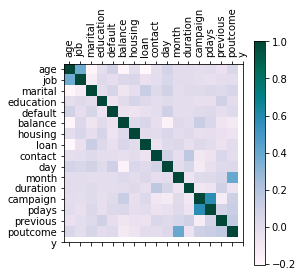

In [42]:
plt.matshow(df.corr(), cmap= "PuBuGn")
plt.colorbar()

plt.xticks(list(range(len(df.columns))), df.columns, rotation = 'vertical')
plt.yticks(list(range(len(df.columns))), df.columns, rotation = 'horizontal')
plt.show()

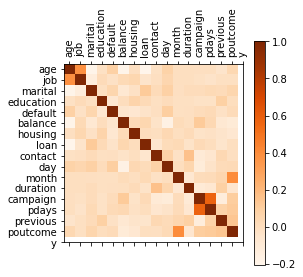

In [43]:
plt.matshow(df.corr(), cmap= "Oranges")
plt.colorbar()

plt.xticks(list(range(len(df.columns))), df.columns, rotation = 'vertical')
plt.yticks(list(range(len(df.columns))), df.columns, rotation = 'horizontal')
plt.show()

In [44]:
#The list of the attributes in decesding order. There is a strong relation 
#between y and and duration. So they are 1st in the list
df.corr()['y'].sort_values(ascending=False)

y            1.000000
duration     0.401118
poutcome     0.142628
previous     0.116714
pdays        0.104087
education    0.055368
age          0.045092
month        0.023335
balance      0.017905
default      0.001303
contact     -0.002108
day         -0.011244
marital     -0.015042
campaign    -0.061147
loan        -0.070517
housing     -0.104683
Name: y, dtype: float64

plot.box() is a very important function to find out the outliers. 

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


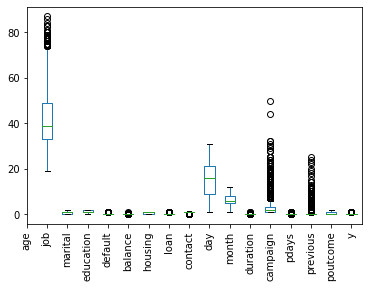

In [45]:
df.plot.box()
plt.xticks(list(range(len(df.columns))), df.columns, rotation = 'vertical')
plt.show()

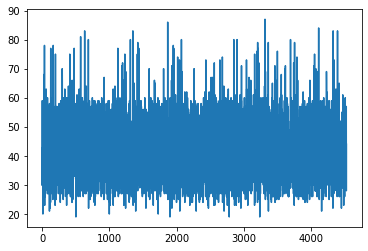

In [46]:
plt.plot(df.age.values)

(array([ 111.,  944., 1235.,  869.,  612.,  576.,  100.,   36.,   30.,
           8.]),
 array([19. , 25.8, 32.6, 39.4, 46.2, 53. , 59.8, 66.6, 73.4, 80.2, 87. ]),
 <a list of 10 Patch objects>)

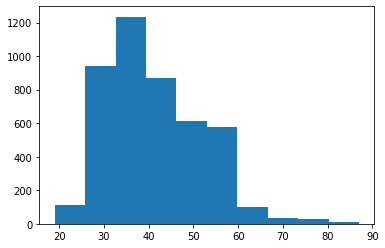

In [47]:
plt.hist(df.age.values)